In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
import nltk
from nltk.corpus import stopwords

In [4]:
import gensim

In [5]:
from wordcloud import WordCloud

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.metrics import roc_auc_score

In [8]:
import warnings

In [9]:
warnings.filterwarnings("ignore")

### Importing the datasets

In [10]:
df_real = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

In [11]:
df_fake['target'] = 0
df_real['target'] = 1

In [12]:
df = pd.concat([df_fake,df_real]).reset_index(drop=True)
df['content'] = df['title'] + df['text']

In [13]:
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  target  \
0  December 31, 2017       0   
1  December 31, 2017       0   
2  December 30, 2017       0   
3  December 29, 2017       0   
4  December 25, 2017       0   

                                             content  
0   Donald Trump Sends Out Embarrassing New Year’...  
1   Drunk Bragging Trump Staffer Started Russian ...  
2   Sheriff David Clarke Becomes An Internet Joke...  
3   Trump Is So Obsessed He Even Has Obama’s Name...  
4   Pope Francis Just Called Out Donald Trump Dur...

In [14]:
df.iloc[0,]['title']

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing'

#### Checking for any null values

In [15]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
content    0
dtype: int64

#### Creating and extending a stop words list

In [16]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

#### Function to remove all the needless words

In [17]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
    return result

In [18]:
preprocess('I am Donald Trump, the 45th President of the United States of America')

['donald', 'trump', 'president', 'united', 'states', 'america']

In [19]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

#### Cleaning the subject column

In [20]:
df.subject = df.subject.replace({'politics':'PoliticsNews', 'politicsNews':'PoliticsNews'})

In [21]:
df.subject.value_counts()

PoliticsNews       18113
worldnews          10145
News                9050
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

#### Distribution of target values

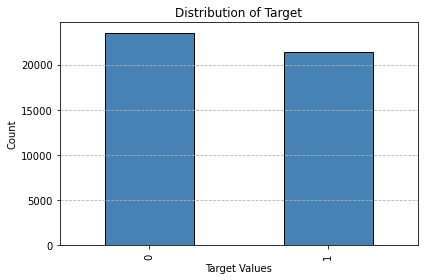

In [22]:
target_v_c = df['target'].value_counts()

fig, ax = plt.subplots()
target_v_c.plot.bar(color='steelblue', edgecolor='black', ax=ax)

ax.set_title('Distribution of Target')
ax.set_xlabel('Target Values')
ax.set_ylabel('Count')
ax.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

#### Distribution of Subject Values

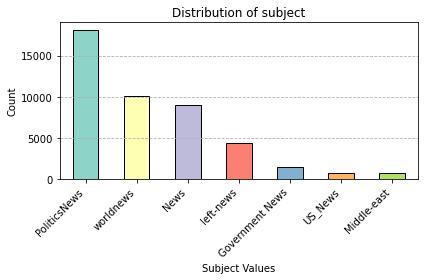

In [23]:
subject_v_c = df['subject'].value_counts()

colors = sns.color_palette('Set3', len(subject_v_c))

fig, ax = plt.subplots()
subject_v_c.plot.bar(color=colors, edgecolor='black', ax=ax)

ax.set_title('Distribution of subject')
ax.set_xlabel('Subject Values')
ax.set_ylabel('Count')
ax.grid(axis='y', linestyle='--')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [24]:
df.head(3)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   

                date  target  \
0  December 31, 2017       0   
1  December 31, 2017       0   
2  December 30, 2017       0   

                                             content  
0   Donald Trump Sends Out Embarrassing New Year’...  
1   Drunk Bragging Trump Staffer Started Russian ...  
2   Sheriff David Clarke Becomes An Internet Joke...

#### Applying the above made preprocess function on the title

In [25]:
df['cleaned_title'] = df['title'].apply(preprocess)
df['joined_cleaned_title'] = df['cleaned_title'].apply(lambda x: ' '.join(x))

In [26]:
df.head(3)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   

                date  target  \
0  December 31, 2017       0   
1  December 31, 2017       0   
2  December 30, 2017       0   

                                             content  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   

                                       cleaned_title  \
0  [donald, trump, sends, embarrassing, new, year...   
1  [drunk, bragging, trump, staffer, started, rus...   
2  [sheriff, david, clarke, internet, joke, threa...   

                                joined_cleaned_title  
0  donald trump sends embarrassing new year eve m...  
1  drunk bragging trump staffer started russian c...  
2  sheriff david clarke internet joke threatening...

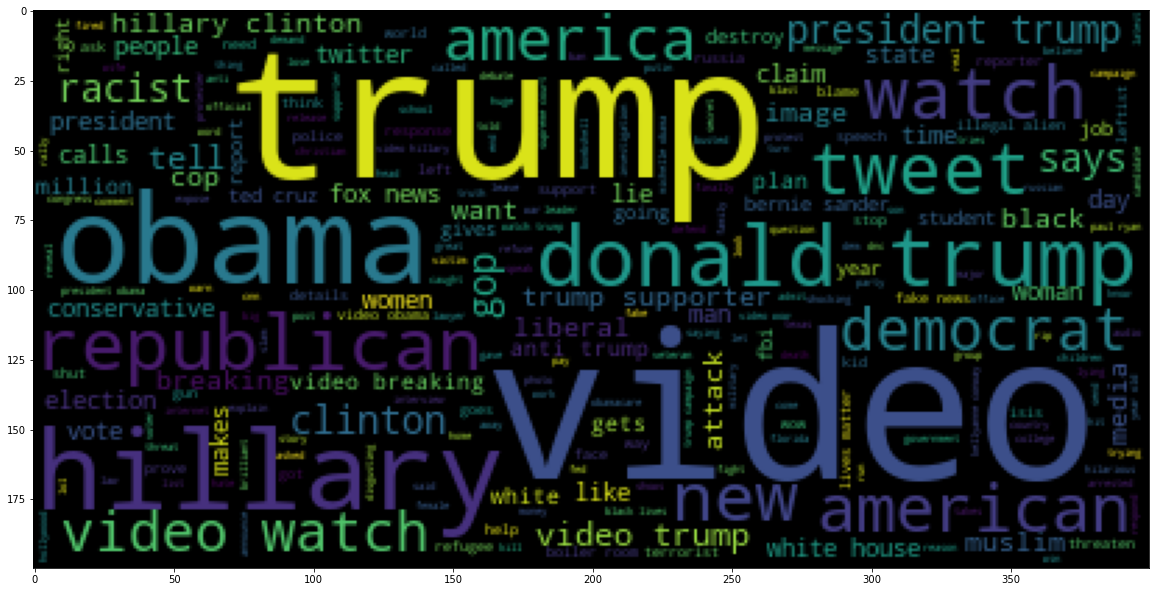

In [27]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, stopwords = stop_words).generate(' '.join(df[df.target==0].joined_cleaned_title))
plt.imshow(wc)

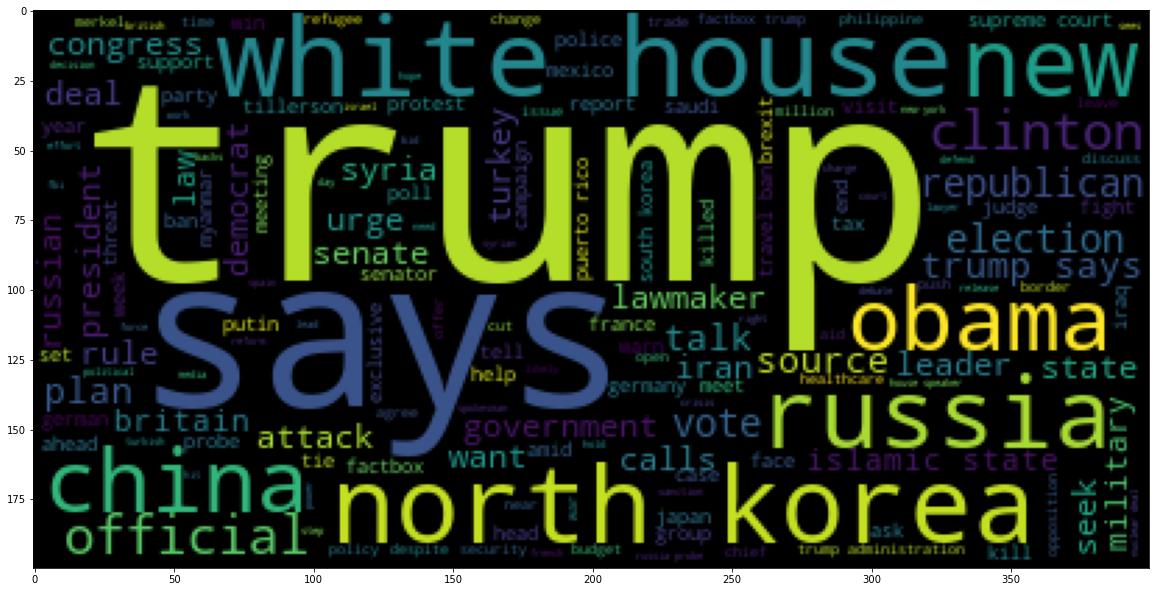

In [28]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, stopwords = stop_words).generate(' '.join(df[df.target==1].joined_cleaned_title))
plt.imshow(wc)

In [29]:
df.joined_cleaned_title.apply(lambda token: nltk.word_tokenize(token))

0        [donald, trump, sends, embarrassing, new, year...
1        [drunk, bragging, trump, staffer, started, rus...
2        [sheriff, david, clarke, internet, joke, threa...
3         [trump, obsessed, obama, coded, website, images]
4        [pope, francis, called, donald, trump, christm...
                               ...                        
44893    [fully, committed, nato, backs, new, approach,...
44894    [lexisnexis, withdrew, products, chinese, market]
44895                  [minsk, cultural, hub, authorities]
44896    [vatican, upbeat, possibility, pope, francis, ...
44897      [indonesia, buy, billion, worth, russian, jets]
Name: joined_cleaned_title, Length: 44898, dtype: object

#### Distribution of the tokens(useful words) for every entry

In [30]:
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.joined_cleaned_title], nbins = 50)
fig.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.joined_cleaned_title, df.target, test_size = 0.2)

#### Instatiating CountVectorizer Function

In [32]:
vec_train = CountVectorizer()
vec_train.fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)

In [33]:
model = LogisticRegression()
model.fit(X_vec_train, y_train)
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.9507827081740124


#### Applying the above made preprocess function on the text value of each entry

In [34]:
df['clean_text'] = df['text'].apply(preprocess)
df['clean_joined_text']=df['clean_text'].apply(lambda x:" ".join(x))

#### Distribution of the tokens for each entry

In [35]:
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined_text], nbins = 60)
fig.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.clean_joined_text, df.target, test_size = 0.2)

In [37]:
vec_train = CountVectorizer()
vec_train.fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)

In [38]:
model = LogisticRegression(C=2.5)
model.fit(X_vec_train, y_train)

LogisticRegression(C=2.5)

In [39]:
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.995081638428825


#### Applying the preprocess function to text and title

In [ ]:
df['clean_final'] = df['content'].apply(preprocess)
df['clean_joined_final']=df['clean_final'].apply(lambda x:" ".join(x))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.clean_joined_final, df.target, test_size = 0.2)


In [ ]:
vec_train = CountVectorizer()
vec_train.fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)

In [ ]:
model = LogisticRegression(C=3)
model.fit(X_vec_train, y_train)

In [ ]:
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)